In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

In [42]:
auto = pd.DataFrame(pd.read_csv('automobile.csv')).dropna()

In [43]:
auto = auto.drop(['symboling','normalized-losses','make',
                  'fuel-type','engine-location','bore',
                  'stroke','compression-ratio'], axis=1)

In [59]:
auto['num-of-doors'] = auto['num-of-doors'].str.replace('four', '4')
auto['num-of-doors'] = auto['num-of-doors'].str.replace('two', '2')
auto['num-of-doors'] = auto['num-of-doors'].astype(float)

In [64]:
auto['num-of-cylinders'] = auto['num-of-cylinders'].str.replace('four', '4')
auto['num-of-cylinders'] = auto['num-of-cylinders'].str.replace('six', '6')
auto['num-of-cylinders'] = auto['num-of-cylinders'].str.replace('five', '7')
auto['num-of-cylinders'] = auto['num-of-cylinders'].str.replace('three', '3')
auto['num-of-cylinders'] = auto['num-of-cylinders'].str.replace('eight', '1')
auto['num-of-cylinders'] = auto['num-of-cylinders'].astype(float)

In [67]:
from sklearn.cluster import KMeans

In [72]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 18 columns):
aspiration          159 non-null object
num-of-doors        159 non-null float64
body-style          159 non-null object
drive-wheels        159 non-null object
wheel-base          159 non-null float64
length              159 non-null float64
width               159 non-null float64
height              159 non-null float64
curb-weight         159 non-null int64
engine-type         159 non-null object
num-of-cylinders    159 non-null float64
engine-size         159 non-null int64
fuel-system         159 non-null object
horsepower          159 non-null float64
peak-rpm            159 non-null float64
city-mpg            159 non-null int64
highway-mpg         159 non-null int64
price               159 non-null float64
dtypes: float64(9), int64(4), object(5)
memory usage: 23.6+ KB


In [78]:
data = auto.select_dtypes(exclude=['object'])

In [98]:
kmeans = KMeans(3) # the value in brackets is K (the number of clusters)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [99]:
data['assignment'] = kmeans.fit_predict(data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
data.sample(5)

,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price,assignment
13,4.0,101.2,176.8,64.8,54.3,2765,6.0,164,121.0,4250.0,21,28,21105.0,1
28,4.0,103.3,174.6,64.6,59.8,2535,4.0,122,88.0,5000.0,24,30,8921.0,0
26,4.0,93.7,157.3,63.8,50.6,1989,4.0,90,68.0,5500.0,31,38,7609.0,0
40,4.0,96.5,175.4,62.5,54.1,2372,4.0,110,86.0,5800.0,27,33,10295.0,0
187,4.0,97.3,171.7,65.5,55.7,2319,4.0,97,68.0,4500.0,37,42,9495.0,0


Text(0,0.5,'price')

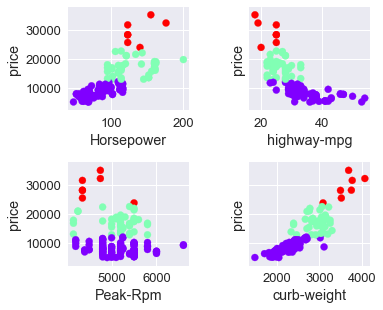

In [160]:
fig, axs = plt.subplots(2,2, sharex=False, sharey=True)
plt.subplots_adjust(left  = 0.2, right = 0.9, bottom = 0.1, top = 1, wspace = 0.5, hspace = 0.5)  

axs[0,0].scatter(data['horsepower'], data['price'], c=data['assignment'], cmap='rainbow')
axs[0,0].set_xlabel('Horsepower')
axs[0,0].set_ylabel('price')


axs[0,1].scatter(data['highway-mpg'], data['price'], c=data['assignment'], cmap='rainbow')
axs[0,1].set_xlabel('highway-mpg')
axs[0,1].set_ylabel('price')

axs[1,1].scatter(data['curb-weight'], data['price'], c=data['assignment'], cmap='rainbow')
axs[1,1].set_xlabel('curb-weight')
axs[1,1].set_ylabel('price')


axs[1,0].scatter(data['peak-rpm'], data['price'], c=data['assignment'], cmap='rainbow')
axs[1,0].set_xlabel('Peak-Rpm')
axs[1,0].set_ylabel('price')

In [112]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(data)
x_scaled

array([[ 0.82078268,  0.29815708,  0.36442988, ..., -0.3233128 ,
         0.42739781,  1.15200709],
       [ 0.82078268,  0.22050438,  0.36442988, ..., -1.56577168,
         1.02473438,  1.15200709],
       [ 0.82078268,  1.46294766,  1.76602852, ..., -1.0998496 ,
         1.06910795,  1.15200709],
       ...,
       [ 0.82078268,  2.10358247,  1.42651084, ..., -1.41046432,
         1.71337812,  1.15200709],
       [ 0.82078268,  2.10358247,  1.42651084, ..., -0.78923488,
         1.88148569,  1.15200709],
       [ 0.82078268,  2.10358247,  1.42651084, ..., -1.0998496 ,
         1.90793917,  1.15200709]])

In [113]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[2226.0,
 1252.3994597352626,
 1042.4148898072415,
 915.8264176013121,
 827.9842503217508,
 737.8846987373335,
 681.5639433085476,
 637.026032782195,
 585.4337522229293]

Text(0,0.5,'Within-cluster Sums of Squares')

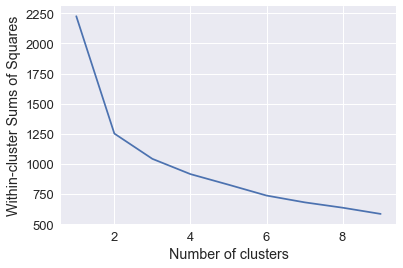

In [114]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sums of Squares')